## IA376I – Tópicos em Engenharia de Computação VII
### Tópico: Análise de Dados Visual (Visual Analytics)
#### Participação 2 - Exercícios
**Professora:** Wu, Shin - Ting<br>

**Aluno:** Sávio Vieira Lacerda da Silva **RA:** 218528<br>

#### 1. Existem vários sites e recursos online que apresentam exemplos de designs de interface gráfica considerados ruins. Alguns deles são:
Interface do usuário para aplicativos móveis ou web https://synodus.com/blog/web-development/bad-ui-design/ <br>
Coleção de erros comuns de design de interface http://hallofshame.gp.co.at/shame.htm <br>
Exemplos de design de interface inadequdo de forma geral https://www.interaction-desiorg/literature/article/bad-ui-design-examples <br>
Esses recursos podem ser úteis para projetistas de interface de usuário e desenvolvedores, pois
oferecem insights sobre o que não fazer em seus próprios projetos e inspiração para evitar erros
comuns de design. Relacione cada um dos erros mencionados nos três sites citados aos princípios
discutidos ao longo do capítulo que foram violados.

#### 2. Reescreva em Python, usando a gramática dos gráficos implementada no pacote plotnine [23], os códigos em R no

##### (a) Exemplo na Seção 8.1 na referência [29].

##### (b) Exemplo explorado na Seção 3.5.3.

##### (c) caso 1 da Seção 10.1 na referência [29].


In [2]:
from gapminder import gapminder
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


~~~R
gapminder |> 
  filter(year == 2015 & country %in% c("Sri Lanka","Turkey")) |> 
  select(country, infant_mortality)
#>     country infant_mortality
#> 1 Sri Lanka              8.4
#> 2    Turkey             11.6 
~~~

In [5]:
gapminder_filtered = gapminder[(gapminder['year'] == 1952) & ((gapminder['country'] == 'Sri Lanka') | (gapminder['country'] == 'Turkey'))]
print('country infant_mortality:\n',gapminder_filtered[0:5])

country infant_mortality:
         country continent  year  lifeExp       pop   gdpPercap
1428  Sri Lanka      Asia  1952   57.593   7982342  1083.53203
1572     Turkey    Europe  1952   43.585  22235677  1969.10098


~~~R
filter(gapminder, year == 1962) |>
  ggplot(aes(fertility, life_expectancy)) +
  geom_point()
~~~

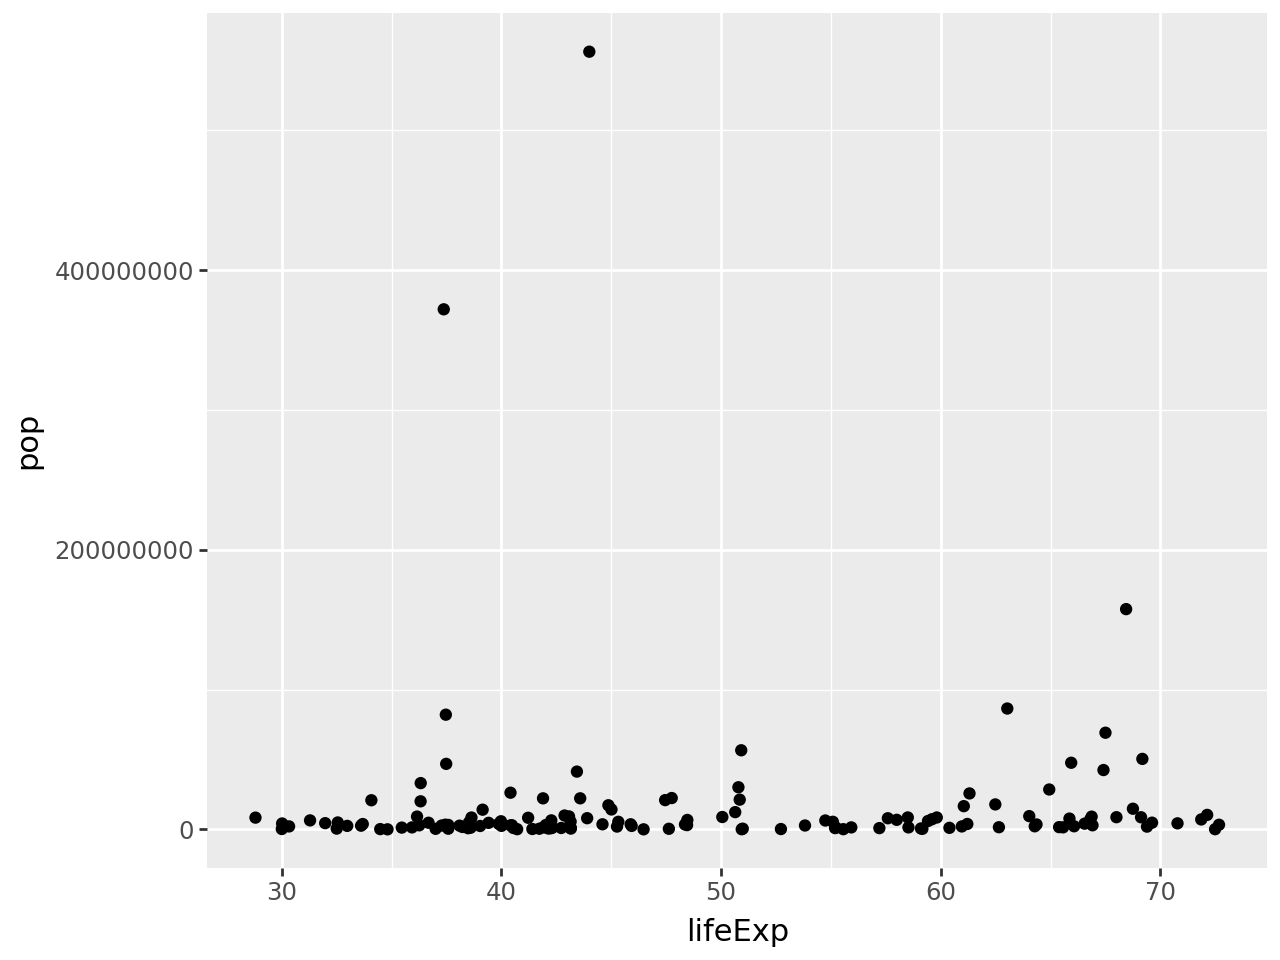

In [29]:
from plotnine import ggplot, aes, geom_point, facet_grid, facet_wrap, geom_line, theme, geom_text, geom_label

(
    ggplot(gapminder[(gapminder['year'] == 1952)])  
    + aes(x="lifeExp", y="pop")  
    + geom_point()  
)

~~~R
filter(gapminder, year == 1962) |>
  ggplot( aes(fertility, life_expectancy, color = continent)) +
  geom_point()
~~~

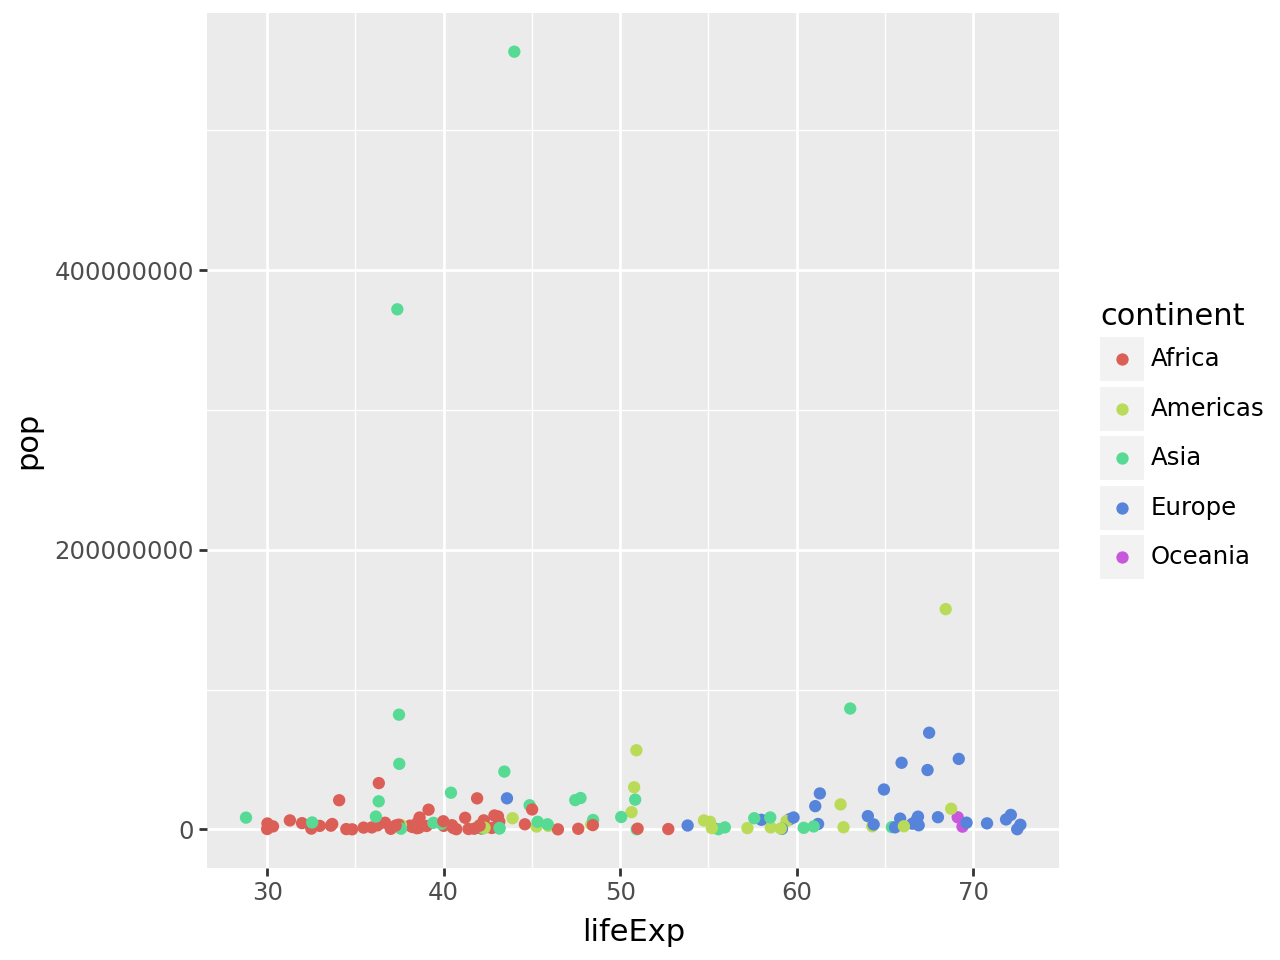

In [10]:
(
    ggplot(gapminder[(gapminder['year'] == 1952)])  
    + aes(x="lifeExp", y="pop",color="continent")  
    + geom_point()  
)

~~~R
filter(gapminder, year%in%c(1962, 2012)) |>
  ggplot(aes(fertility, life_expectancy, col = continent)) +
  geom_point() +
  facet_grid(year~continent)
~~~~

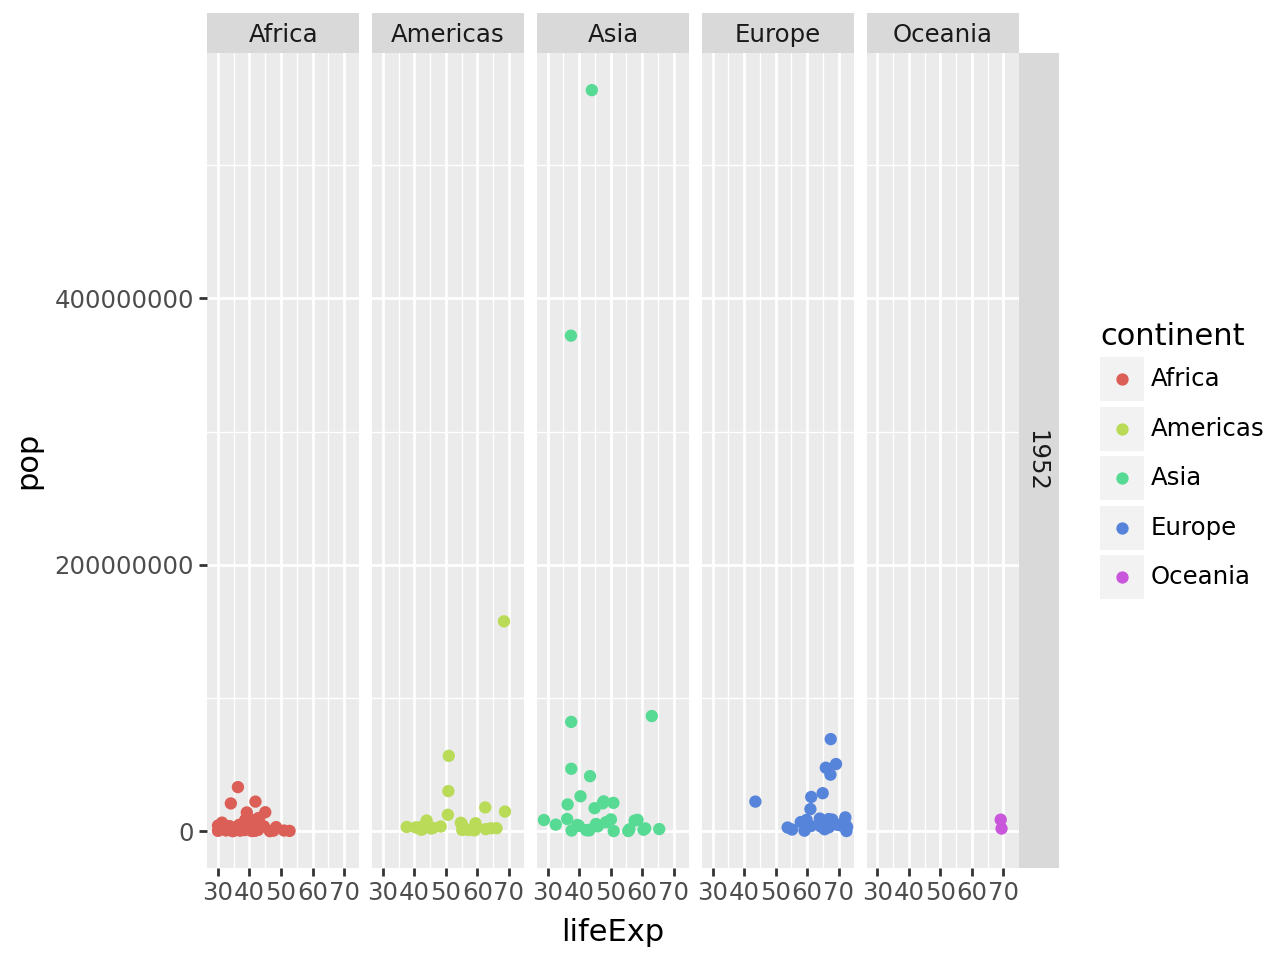

In [12]:
(
    ggplot(gapminder[(gapminder['year'] == 1952) | (gapminder['year'] == 2012)])  
    + aes(x="lifeExp", y="pop",color="continent")  
    + geom_point()  
    + facet_grid('year~continent')
)

~~~R
filter(gapminder, year%in%c(1962, 2012)) |>
  ggplot(aes(fertility, life_expectancy, col = continent)) +
  geom_point() +
  facet_grid(. ~ year)
~~~

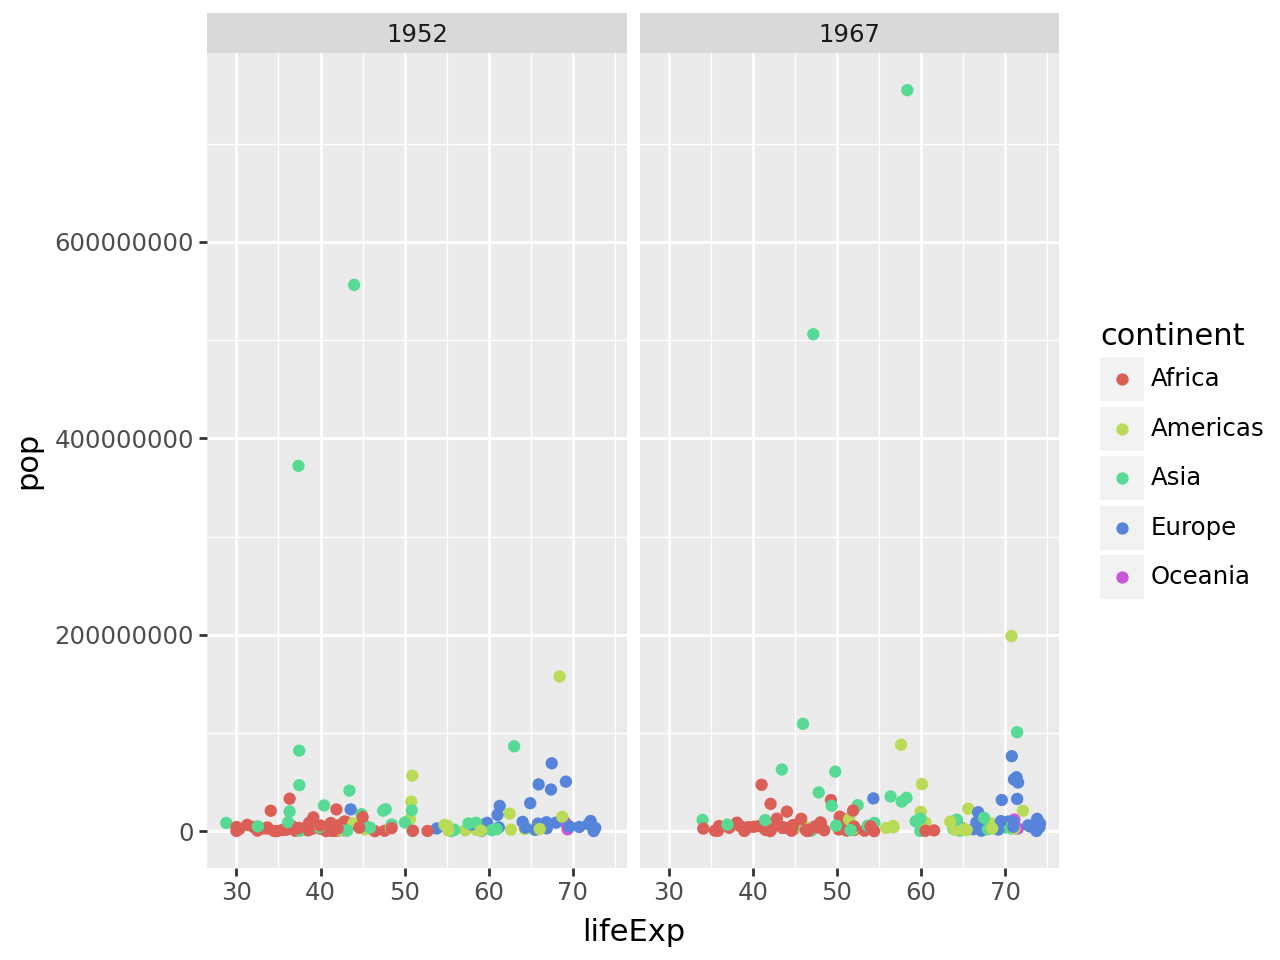

In [17]:
(
    ggplot(gapminder[(gapminder['year'] == 1952) | (gapminder['year'] == 1967)])  
    + aes(x="lifeExp", y="pop",color="continent")  
    + geom_point()  
    + facet_grid('. ~ year')
)

~~~R
years <- c(1962, 1980, 1990, 2000, 2012)
continents <- c("Europe", "Asia")
gapminder |> 
  filter(year %in% years & continent %in% continents) |>
  ggplot( aes(fertility, life_expectancy, col = continent)) +
  geom_point() +
  facet_wrap(~year) 
~~~

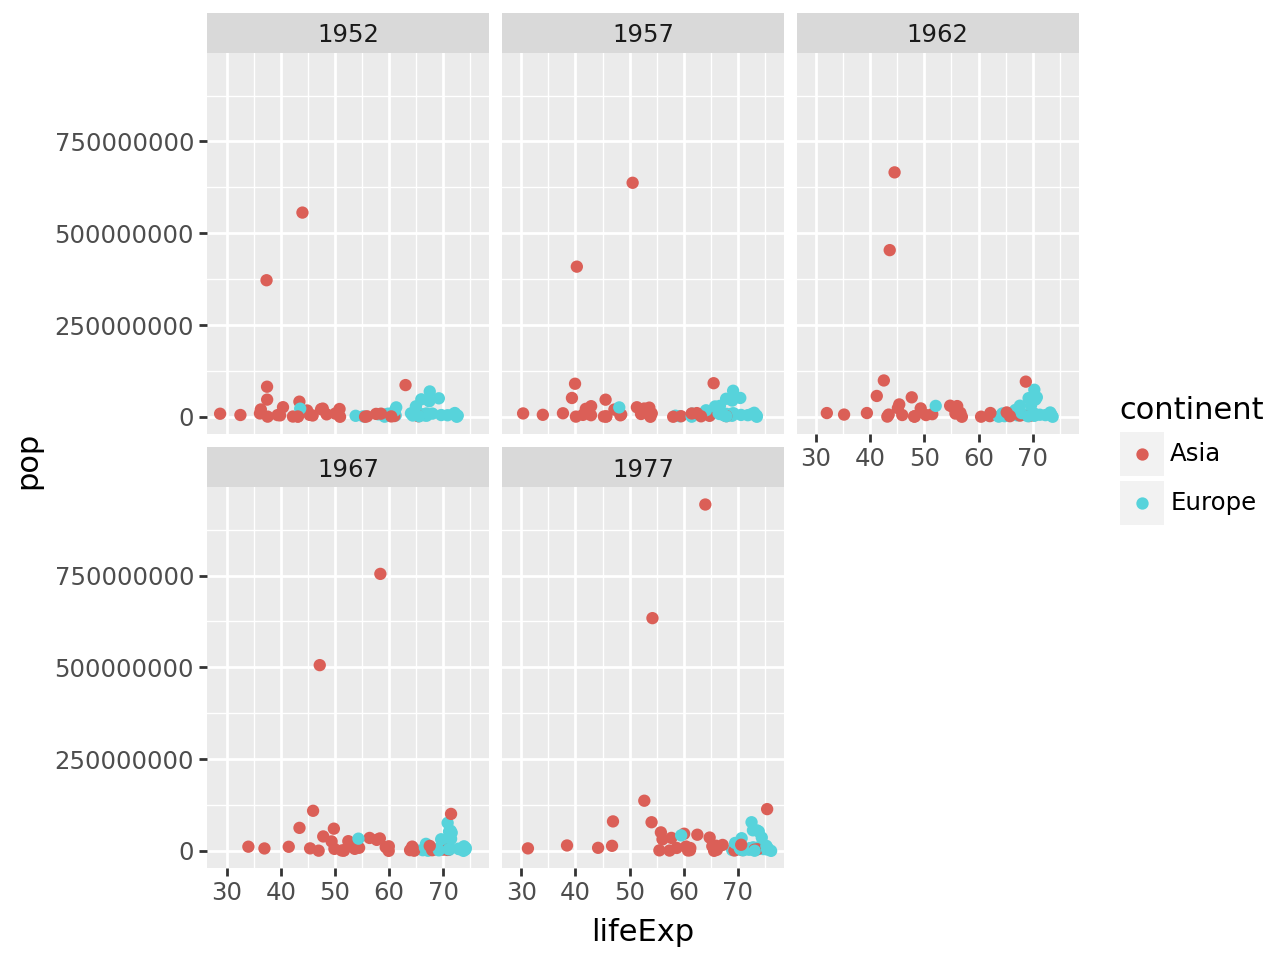

In [23]:
years = [1952, 1962, 1957, 1967, 1977]
continents =["Europe", "Asia"]
(
    ggplot(gapminder[(gapminder['year'].isin(years)) & (gapminder['continent'].isin(continents))])  
    + aes(x="lifeExp", y="pop",color="continent")  
    + geom_point()  
    + facet_wrap('~ year')
)

~~~R
filter(gapminder, year%in%c(1962, 2012)) |>
  ggplot(aes(fertility, life_expectancy, col = continent)) +
  geom_point() +
  facet_wrap(. ~ year, scales = "free")
~~~

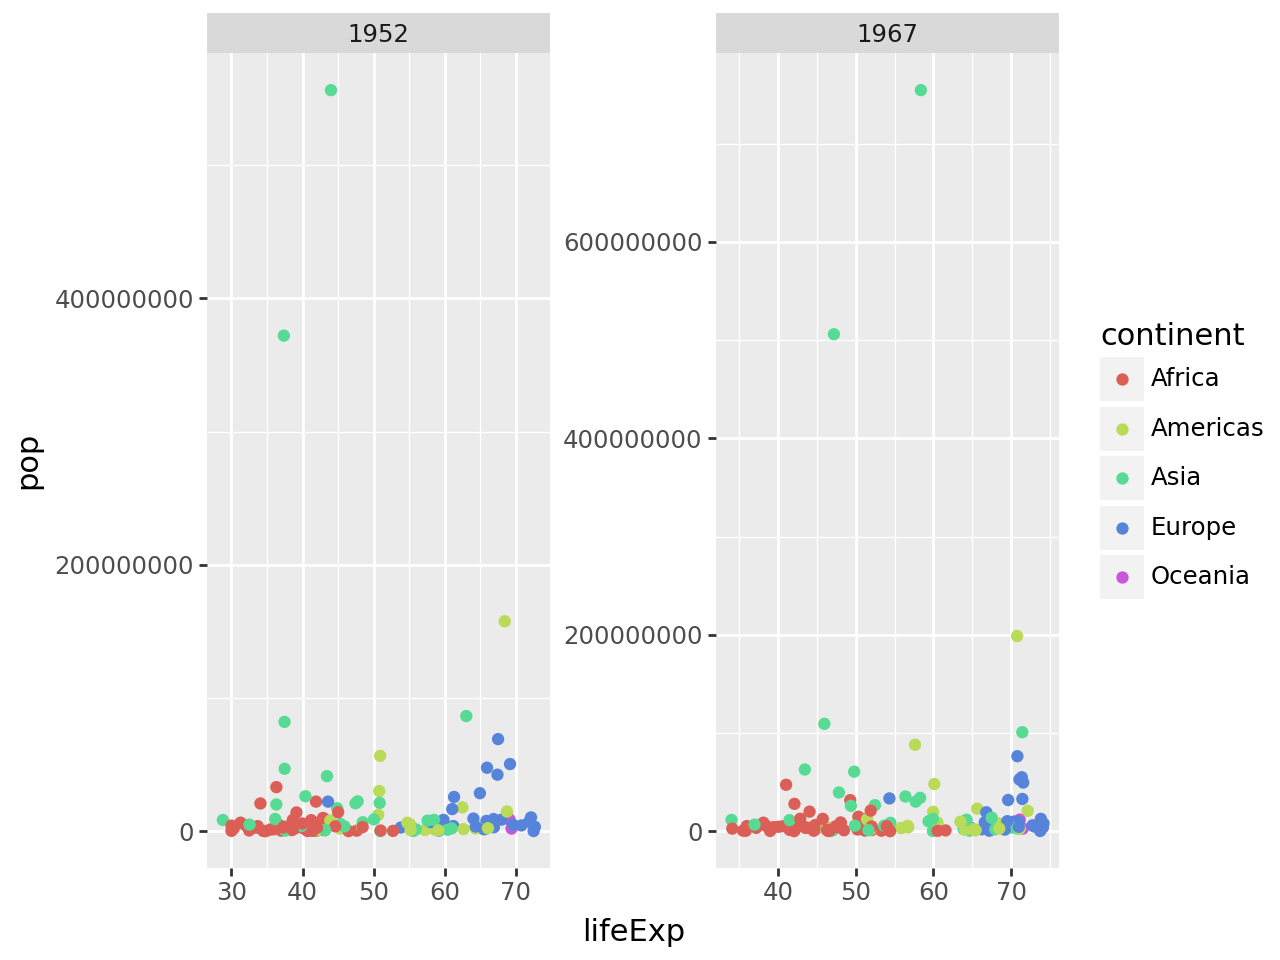

In [6]:
(
    ggplot(gapminder[(gapminder['year'] == 1952) | (gapminder['year'] == 1967)]) 
    + aes(x="lifeExp", y="pop",color="continent")  
    + geom_point()  
    + facet_wrap(' ~ year',scales="free")
)

~~~R
gapminder |> 
  filter(country == "United States") |> 
  ggplot(aes(year, fertility)) +
  geom_point()
~~~

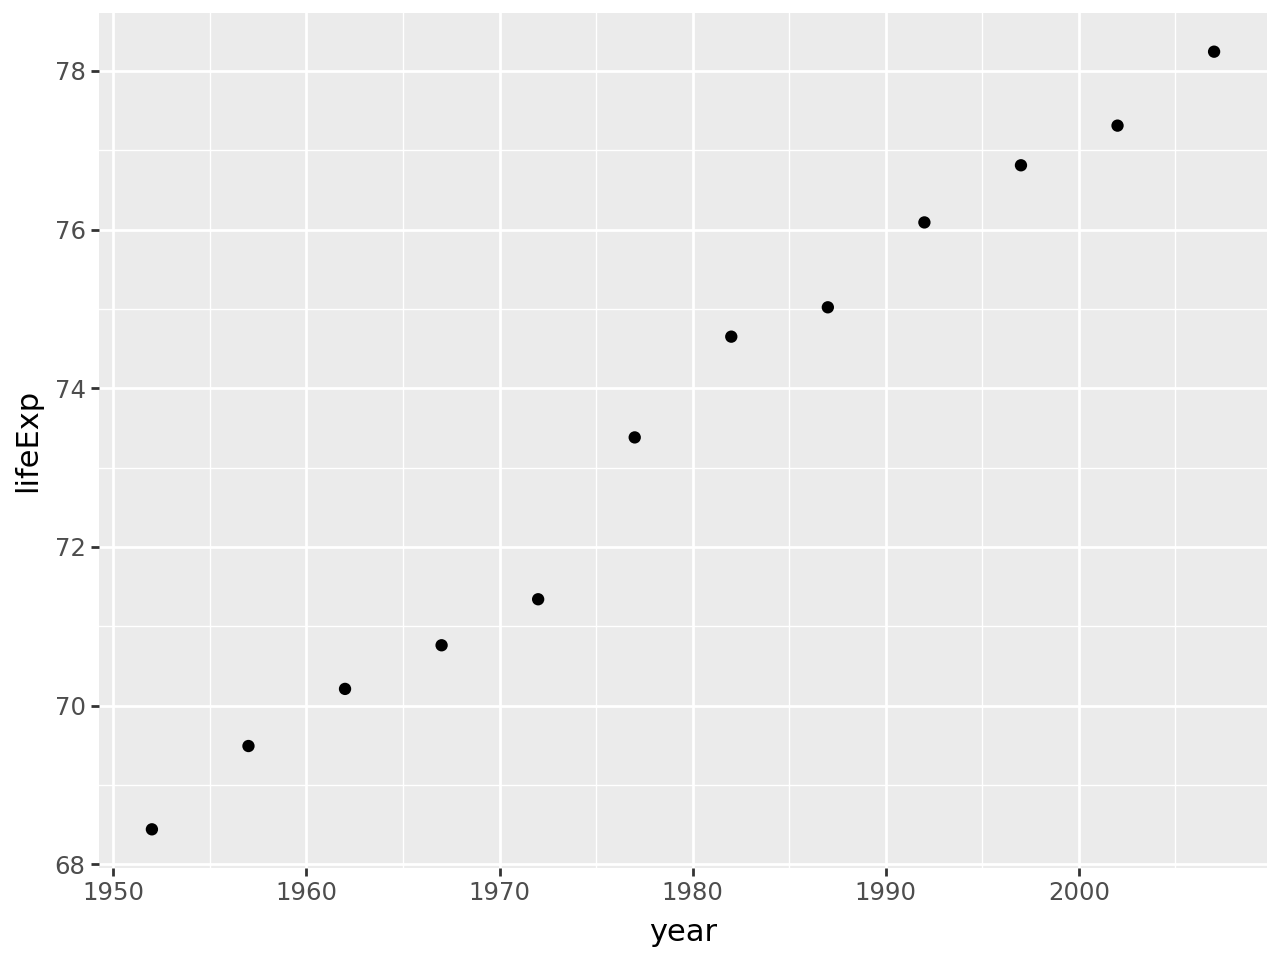

In [6]:
(
    ggplot(gapminder[(gapminder['country'] == 'United States')]) 
    + aes(x="year", y="lifeExp")  
    + geom_point() 
)

~~~R
gapminder |> 
  filter(country == "United States") |> 
  ggplot(aes(year, fertility)) +
  geom_line()
~~~

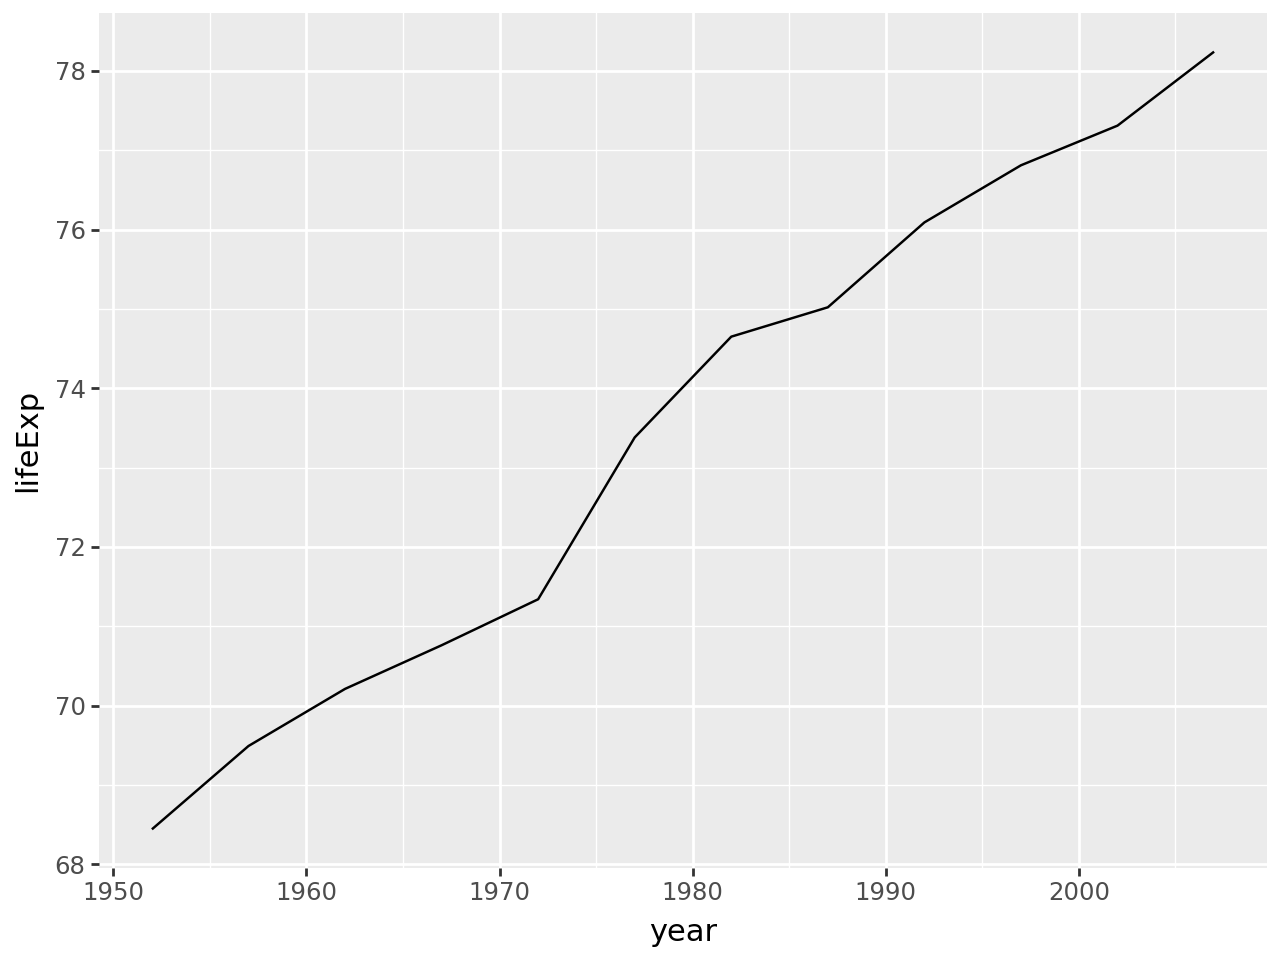

In [7]:
(
    ggplot(gapminder[(gapminder['country'] == 'United States')]) 
    + aes(x="year", y="lifeExp")  
    + geom_line() 
)

~~~R
countries <- c("South Korea","Germany")

gapminder |> filter(country %in% countries) |> 
  ggplot(aes(year,fertility)) +
  geom_line()
~~~

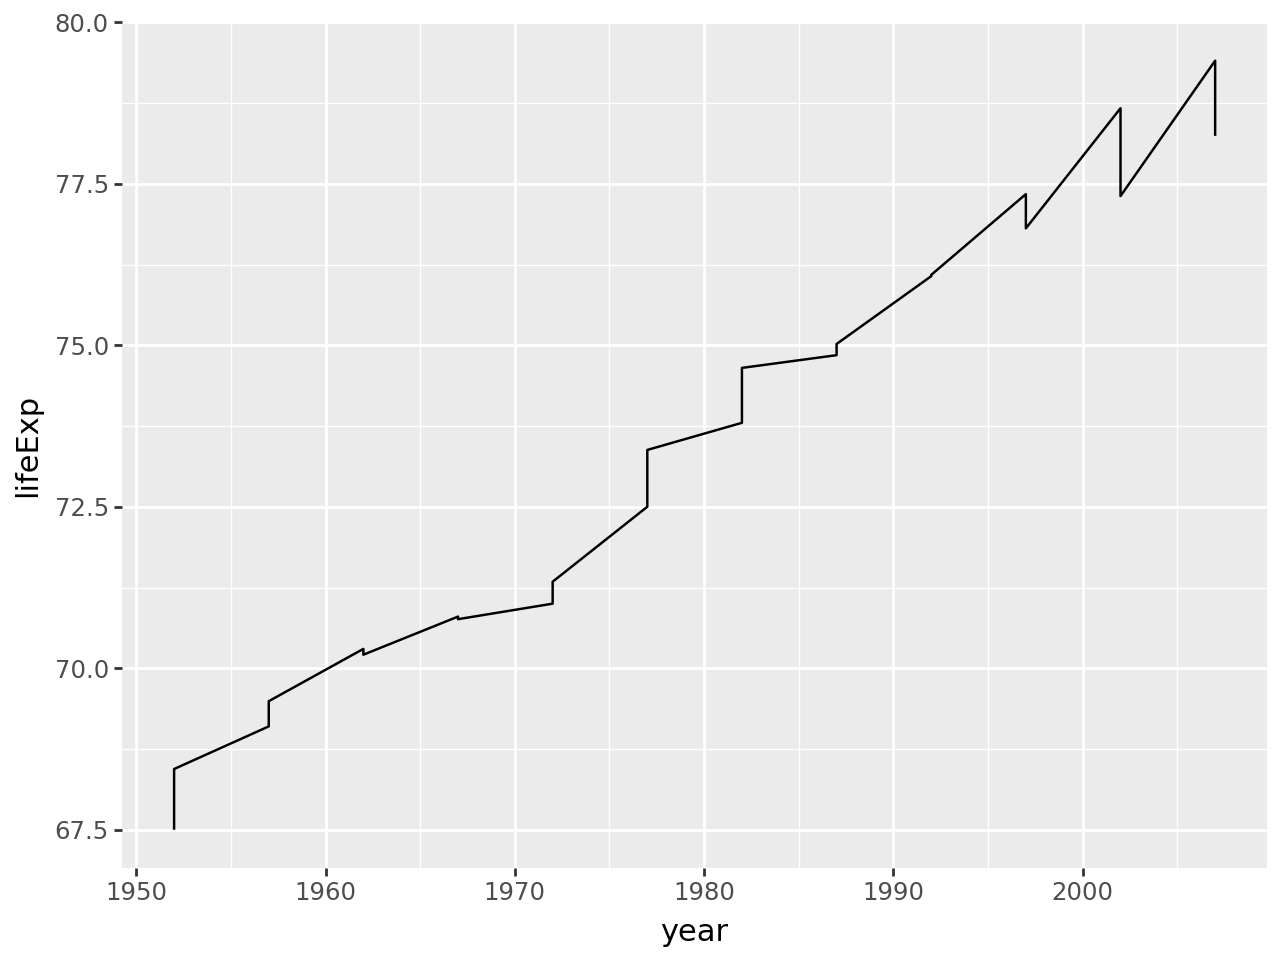

In [14]:
continents =["United States", "Germany"]
(
    ggplot(gapminder[(gapminder['country'].isin(continents))])  
    + aes(x="year", y="lifeExp")  
    + geom_line()
)

~~~R
countries <- c("South Korea","Germany")

gapminder |> filter(country %in% countries & !is.na(fertility)) |> 
  ggplot(aes(year, fertility, group = country)) +
  geom_line()
~~~

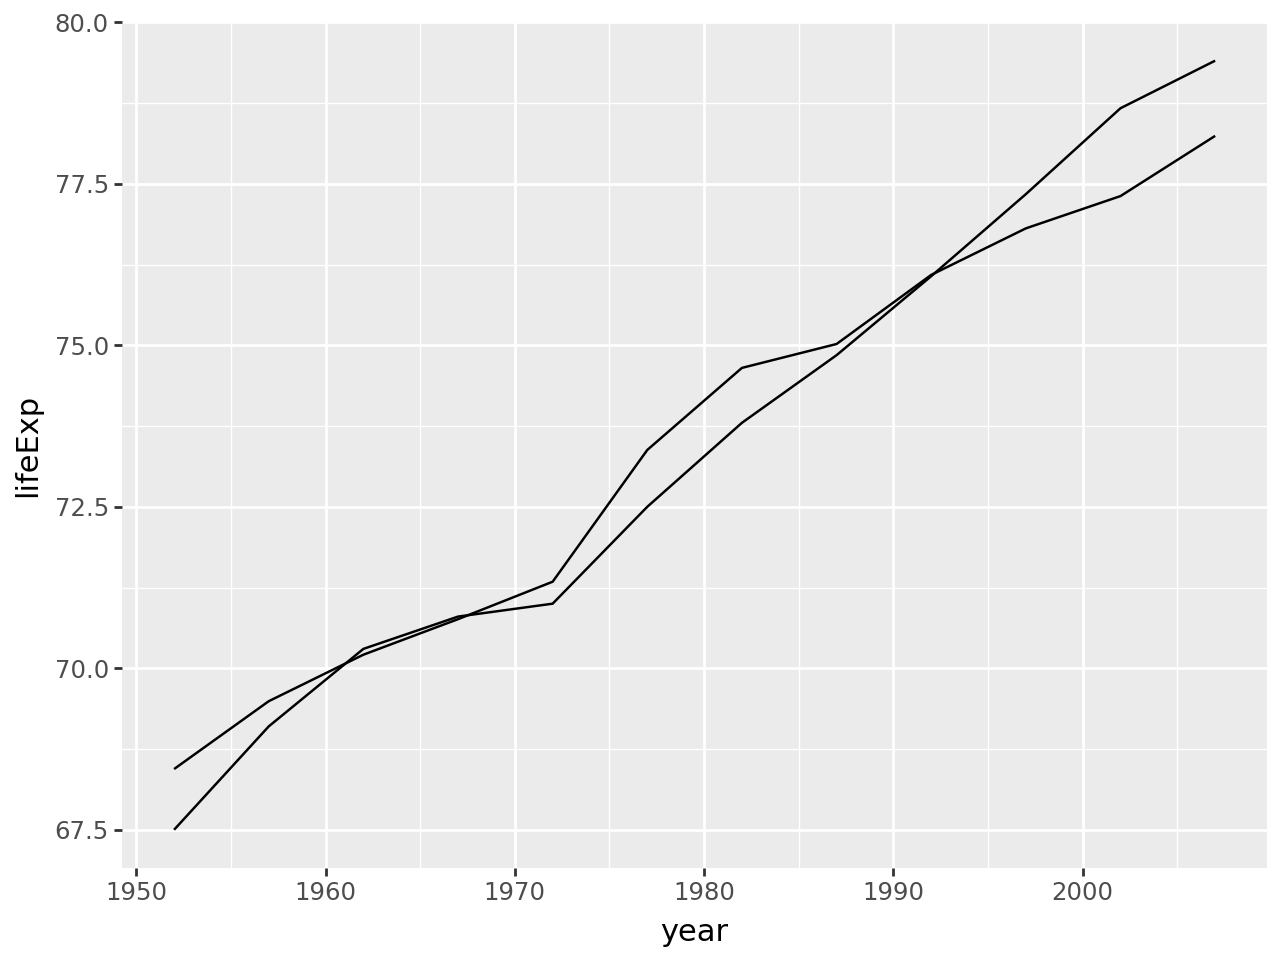

In [17]:
continents =["United States", "Germany"]
(
    ggplot(gapminder[(gapminder['country'].isin(continents)) & (gapminder['lifeExp'].notnull())])  
    + aes(x="year", y="lifeExp", group='country')  
    + geom_line()
)

~~~R
countries <- c("South Korea","Germany")

gapminder |> filter(country %in% countries & !is.na(fertility)) |> 
  ggplot(aes(year,fertility, col = country)) +
  geom_line()
~~~

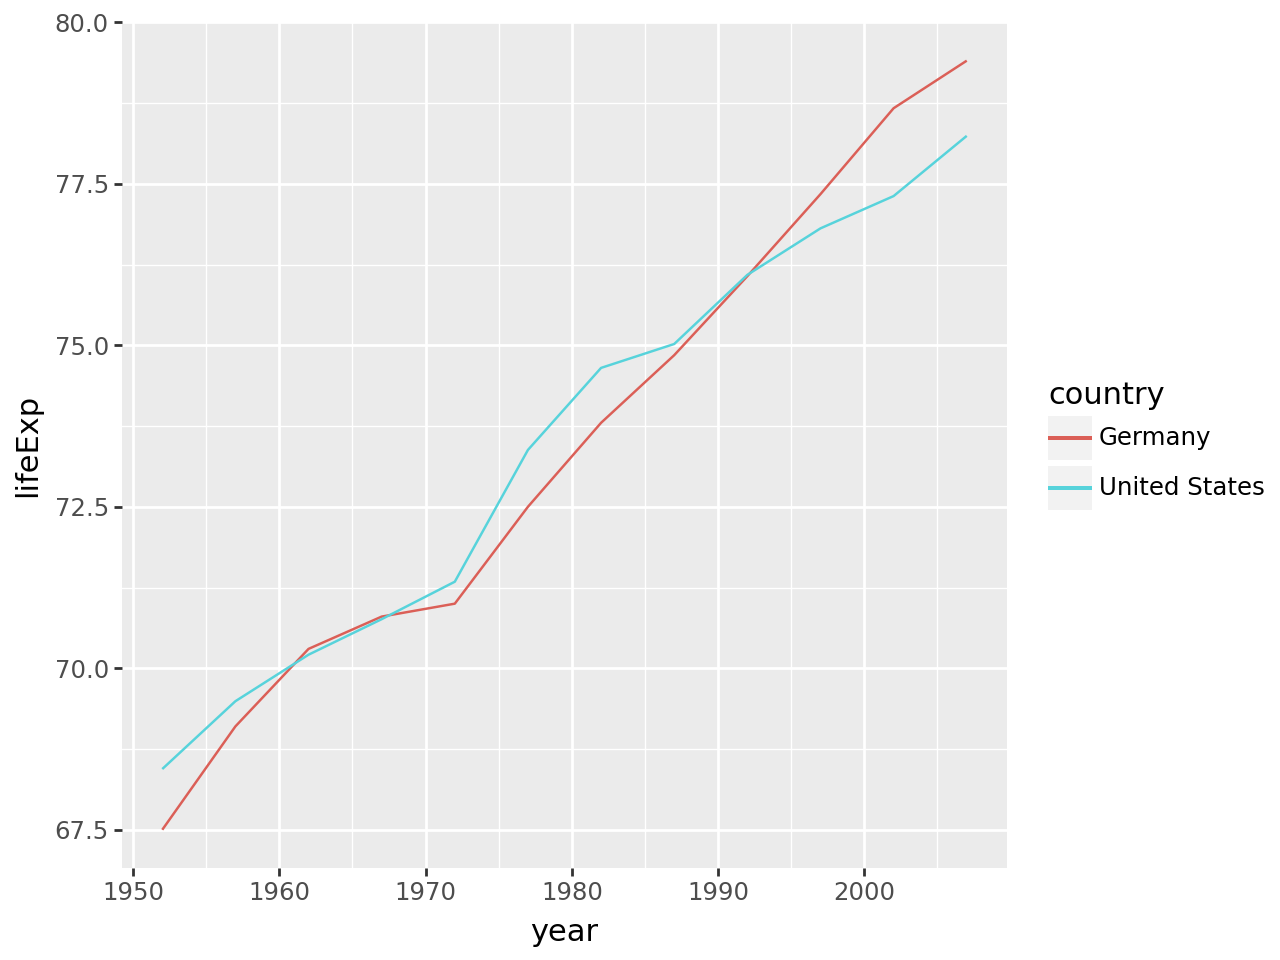

In [22]:
continents =["United States", "Germany"]
(
    ggplot(gapminder[(gapminder['country'].isin(continents)) & (gapminder['lifeExp'].notnull())])  
    + aes(x="year", y="lifeExp", color="country")  
    + geom_line()
)

~~~R
library(geomtextpath)

gapminder |> 
  filter(country %in% countries) |> 
  ggplot(aes(year, life_expectancy, col = country, label = country)) +
  geom_textpath() +
  theme(legend.position = "none")
~~~

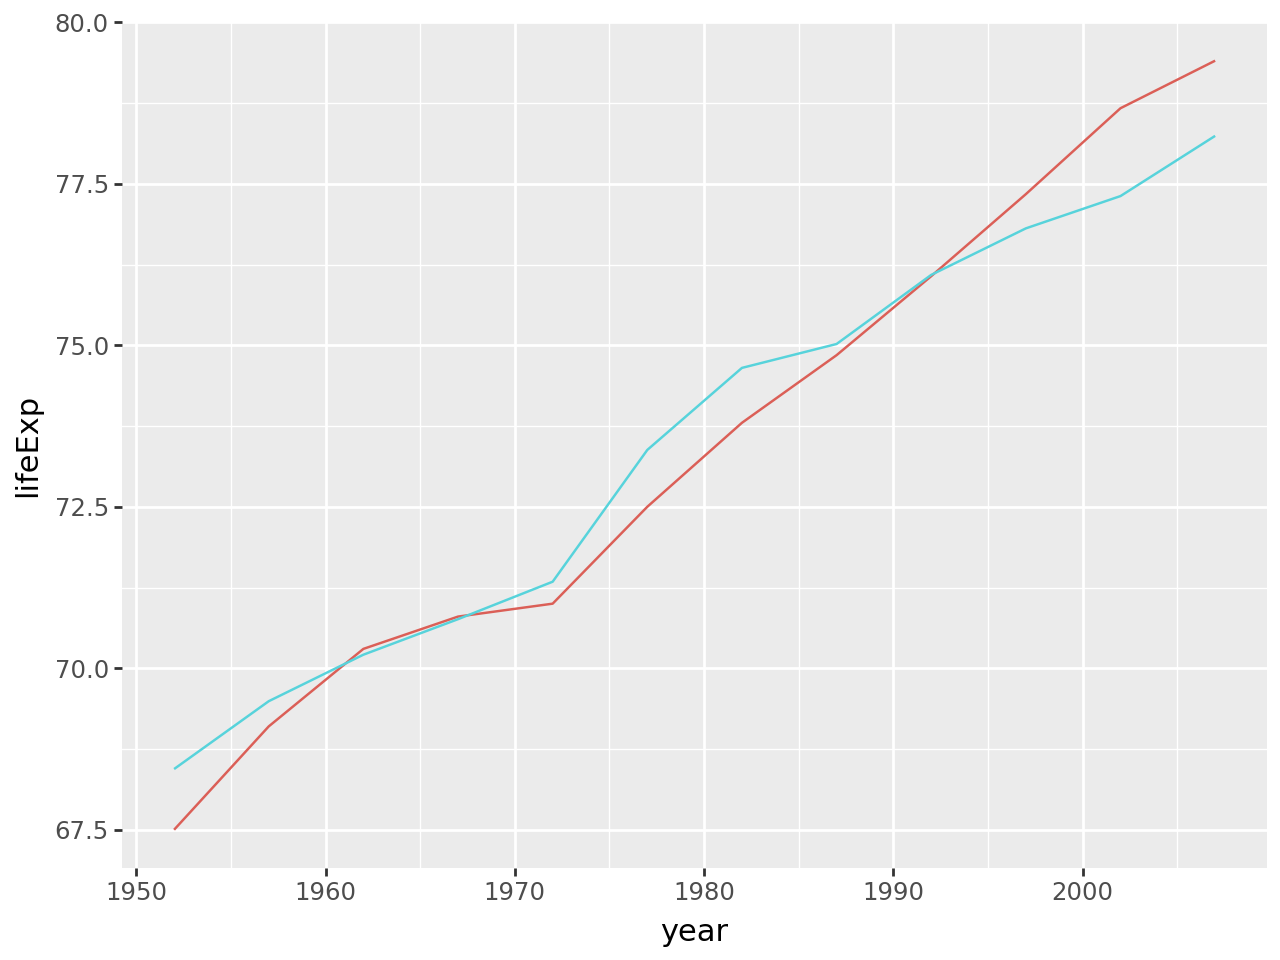

In [40]:
continents =["United States", "Germany"]
(
    ggplot(gapminder[(gapminder['country'].isin(continents)) & (gapminder['lifeExp'].notnull())])  
    + aes(x="year", y="lifeExp", color="country") 
    + geom_line() 
    + theme(legend_position='none')
)

##### (d) caso 2 descrito na Seção 10.5 na referência [29].
